In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import numpy.random as nr
import math
import sklearn.model_selection as ms

from sklearn import preprocessing
import sklearn.model_selection as ms
from sklearn import linear_model
import sklearn.metrics as sklm

In [2]:
#Read Data Source
train_values = pd.read_csv('train_values_OL27nta.csv')
train_values.head(5)

train_labels = pd.read_csv('train_labels_DPetPH2.csv')
train_labels.head(5)

,row_id,gross_rent
0,0,577
1,1,844
2,2,700
3,3,592
4,4,444


In [3]:
#Data Analysis

train = train_values.merge(train_labels,on='row_id')
train.head(5)
train.shape



#get categorical
categorical = [var for var in train.columns if train[var].dtype=='O']
print('There are {} categorical variables'.format(len(categorical)))


#categorical
print(categorical)


#numerical_bool
numerical_boolean = [var for var in train.columns if train[var].dtype!='O']
print('There are {} numerical variables. This includes boolean values'.format(len(numerical_boolean)))

#boolean
boolean = [var for var in train.columns if train[var].dtype=='?']
print('There are {} boolean variables'.format(len(boolean)))

#numerical
numerical = [var for var in train[numerical_boolean] if var not in boolean]
print('There are {} numerical variables'.format(len(numerical)))

#discrete
discrete = []
for var in numerical:
    if len(train[var].unique())<20:
        print(var, ' values: ', train[var].unique())
        discrete.append(var)
        
print('There are {} discrete variables'.format(len(discrete)))

#continuous
continuous = [var for var in numerical if var not in discrete and var not in ['row_id', 'gross_rent']]
print(continuous)


# make a list of the variables that contain missing values
vars_with_na = [var for var in train.columns if train[var].isnull().sum()>1]

# print the variable name and the percentage of missing values
for var in vars_with_na:
    print(var, np.round(train[var].isnull().mean(), 3),  ' % missing values')



for var in categorical:
    print(var, 'contains', len(train[var].unique()), 'labels')


for var in discrete:
    print(var, 'contains', len(train[var].unique()), 'labels')


train.describe()    

There are 5 categorical variables
['county_code', 'state', 'rucc', 'urban_influence', 'economic_typology']
There are 41 numerical variables. This includes boolean values
There are 0 boolean variables
There are 41 numerical variables
There are 0 discrete variables
['population', 'renter_occupied_households', 'pct_renter_occupied', 'evictions', 'rent_burden', 'pct_white', 'pct_af_am', 'pct_hispanic', 'pct_am_ind', 'pct_asian', 'pct_nh_pi', 'pct_multiple', 'pct_other', 'poverty_rate', 'pct_civilian_labor', 'pct_unemployment', 'pct_uninsured_adults', 'pct_uninsured_children', 'pct_adult_obesity', 'pct_adult_smoking', 'pct_diabetes', 'pct_low_birthweight', 'pct_excessive_drinking', 'pct_physical_inactivity', 'air_pollution_particulate_matter_value', 'homicides_per_100k', 'motor_vehicle_crash_deaths_per_100k', 'heart_disease_mortality_per_100k', 'pop_per_dentist', 'pop_per_primary_care_physician', 'pct_female', 'pct_below_18_years_of_age', 'pct_aged_65_years_and_older', 'pct_adults_less_than

,row_id,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,pct_hispanic,pct_am_ind,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
count,1562.000000,1.562000e+03,1.562000e+03,1562.000000,1235.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,...,1560.000000,1560.000000,1560.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000,1562.000000
mean,780.500000,1.083407e+05,1.490462e+04,28.525570,397.410526,28.537526,0.769045,0.088593,0.092012,0.018431,...,0.499388,0.228672,0.167707,0.145666,0.346271,0.303030,0.205033,11.621356,10.415138,701.142125
std,451.054875,3.745229e+05,6.255947e+04,8.121601,1522.801074,4.670467,0.203306,0.143505,0.141599,0.074762,...,0.023933,0.034732,0.044555,0.067483,0.071152,0.052236,0.092001,2.756009,2.772070,192.883110
min,0.000000,2.690000e+02,6.400000e+01,7.279000,-1.000000,9.909000,0.009547,0.000000,0.000000,0.000000,...,0.314000,0.082000,0.036000,0.019000,0.074297,0.114458,0.064128,3.654080,0.961076,351.000000
25%,390.250000,1.045275e+04,1.078250e+03,22.874000,3.000000,25.869000,0.649967,0.005523,0.018747,0.001201,...,0.495000,0.208000,0.140000,0.094226,0.300601,0.269461,0.142142,10.014818,8.613691,578.000000
50%,780.500000,2.528200e+04,2.754000e+03,27.199500,27.000000,28.768000,0.846542,0.020599,0.037613,0.002610,...,0.504000,0.227000,0.164000,0.129388,0.352176,0.303303,0.182365,11.435441,10.396898,650.000000
75%,1170.750000,6.836150e+04,7.987000e+03,32.341500,162.500000,31.307250,0.933479,0.102047,0.092998,0.006121,...,0.511000,0.246000,0.191000,0.187719,0.396556,0.337672,0.241234,12.940235,12.250655,773.750000
max,1561.000000,1.002029e+07,1.760277e+06,73.008000,29251.000000,49.665000,0.995141,0.756011,0.987039,0.815817,...,0.564000,0.415000,0.488000,0.535750,0.535536,0.477341,0.788153,29.034900,24.281150,1827.000000


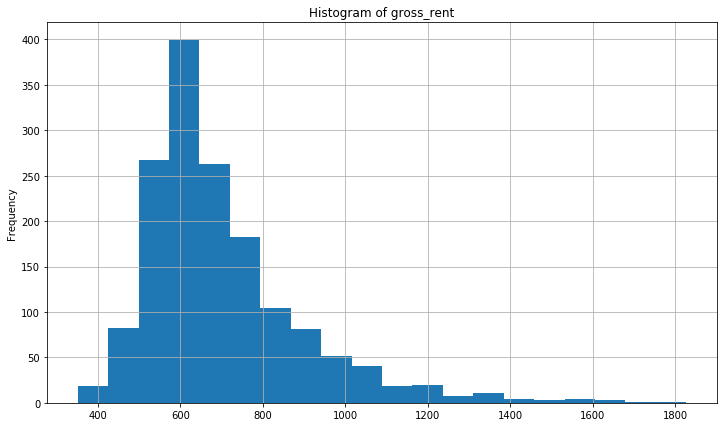

In [4]:
plt.figure(figsize=(12,7))
fig = train.gross_rent.hist(bins=20)
fig.set_title('Histogram of gross_rent')
fig.set_ylabel('Frequency')
plt.show()

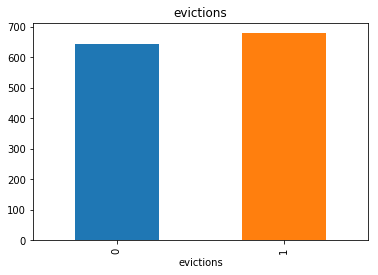

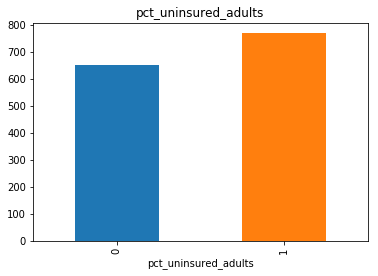

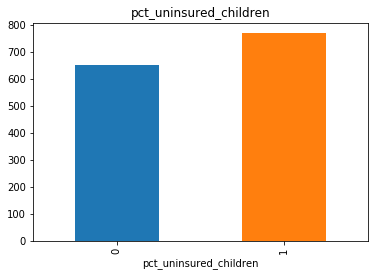

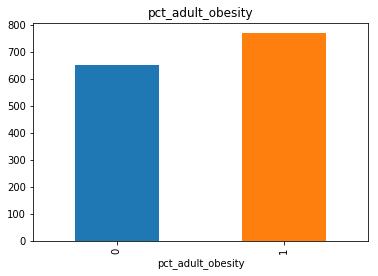

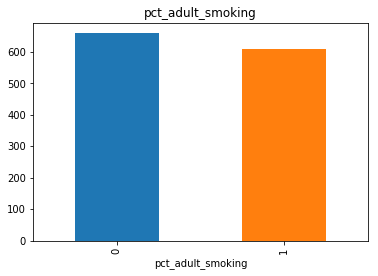

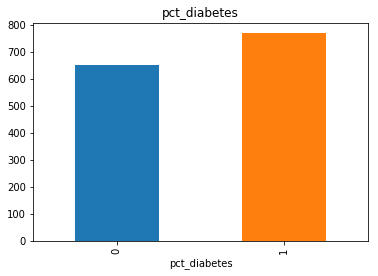

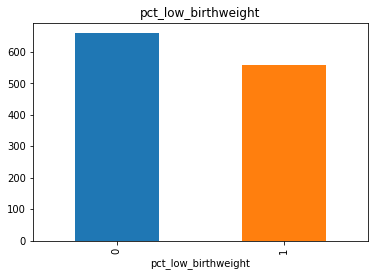

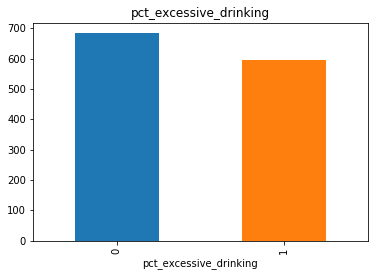

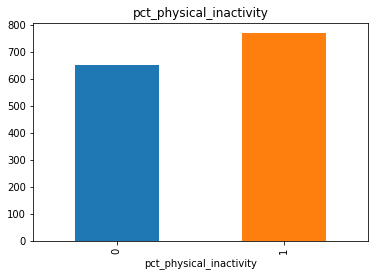

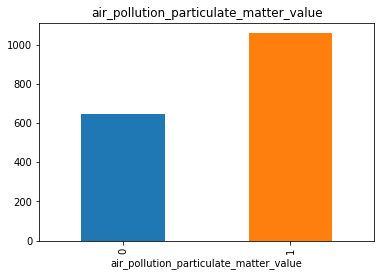

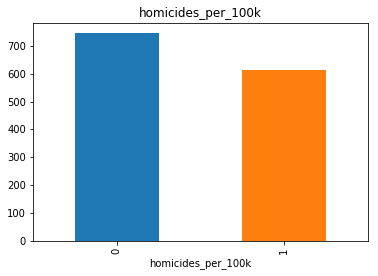

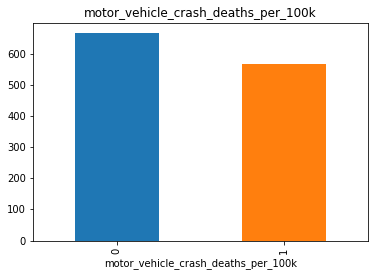

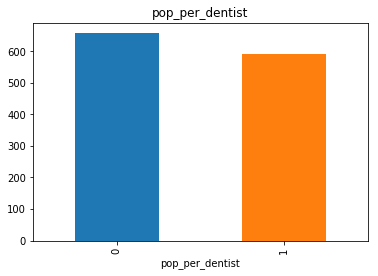

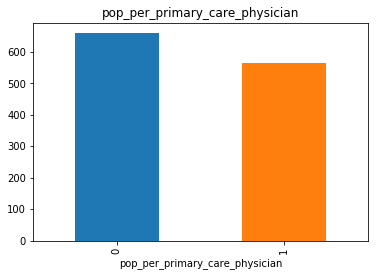

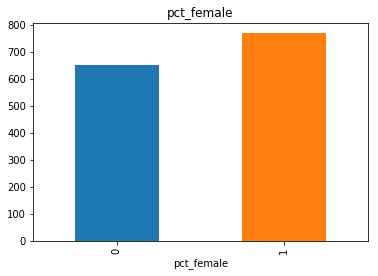

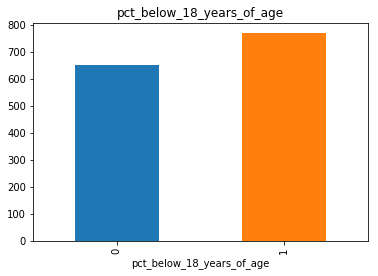

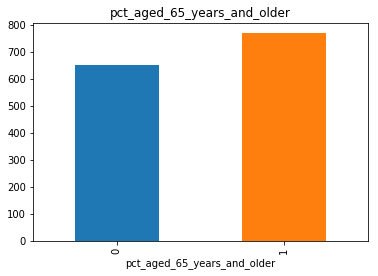

In [5]:
def analyse_na_value(df, var):
    df = df.copy()
    
    # let's make a variable that indicates 1 if the observation was missing or zero otherwise
    df[var] = np.where(df[var].isnull(), 1, 0)
    
    # let's calculate the mean Poverty Probability where the information is missing or present
    df.groupby(var)['gross_rent'].median().plot.bar()
    plt.title(var)
    plt.show()
    
for var in vars_with_na:
    analyse_na_value(train, var)


In [6]:
train.gross_rent.median()

650.0

In [7]:
round(train.gross_rent.mean())

701

In [8]:
round(train.gross_rent.std())

193

In [9]:
train[train.columns[1:]].corr()['gross_rent'][:-1]

population                                    0.398343
renter_occupied_households                    0.345154
pct_renter_occupied                           0.278613
evictions                                     0.325653
rent_burden                                   0.237213
pct_white                                    -0.226985
pct_af_am                                     0.016147
pct_hispanic                                  0.170457
pct_am_ind                                   -0.017942
pct_asian                                     0.592077
pct_nh_pi                                     0.201375
pct_multiple                                  0.255977
pct_other                                     0.338445
poverty_rate                                 -0.352548
pct_civilian_labor                            0.244298
pct_unemployment                             -0.094240
pct_uninsured_adults                         -0.163290
pct_uninsured_children                       -0.070668
pct_adult_

In [10]:
train.state.unique()

array(['fb8cab1', '842bd12', '2b7da97', '5029ed4', 'b795815', '4522abc',
       '4c72956', '78e8330', '9e0007d', 'e74aca3', '1b0d913', '485e9af',
       '4cd9667', '1646cf6', '20d32fc', 'a952566', '8036085', '9dda412',
       '5086a32', 'e899d7f', '158df01', '6d287d7', '08f8fb4', '1dcfd4e',
       '9d0874a', '528ea9f', '7dd3518', 'e2f94fa', 'c479f0c', 'dc9ae72',
       '698ab34', '176f5f0', '0f8930b', '52acab4', '9d1e27d', 'c3dbf0a',
       'b44cfe6', '7572db1', 'bc77872', 'dfc21f3', '3745933', '64ffe5d',
       '09d8cd0', '105e445', 'fa605d5', '9e065a4', 'd233cec', '3337bbb',
       '375d4d3', '914c15f'], dtype=object)

In [11]:
train.query("state in ('1b0d913','a952566')").head(10)

,row_id,county_code,state,population,renter_occupied_households,pct_renter_occupied,evictions,rent_burden,pct_white,pct_af_am,...,pct_female,pct_below_18_years_of_age,pct_aged_65_years_and_older,pct_adults_less_than_a_high_school_diploma,pct_adults_with_high_school_diploma,pct_adults_with_some_college,pct_adults_bachelors_or_higher,birth_rate_per_1k,death_rate_per_1k,gross_rent
12,12,0921795,1b0d913,7218.0,823.0,26.178,3.0,30.468,0.428118,0.058903,...,0.497,0.233,0.202,0.199199,0.362362,0.341341,0.097097,11.608850,13.657471,645
20,20,58d1c1f,a952566,33020.0,4079.0,29.231,114.0,27.552,0.609131,0.286307,...,0.510,0.212,0.199,0.197408,0.398804,0.216351,0.187438,11.508874,12.296323,733
41,41,e043b4f,1b0d913,725489.0,97063.0,35.276,2268.0,28.412,0.619152,0.087421,...,0.512,0.272,0.078,0.081571,0.194361,0.312185,0.411883,13.141566,4.240086,991
47,47,426bbb1,a952566,98922.0,20310.0,46.317,1723.0,28.886,0.606657,0.275855,...,0.522,0.220,0.144,0.155311,0.304609,0.303607,0.236473,14.129478,11.746072,728
61,61,dafe063,1b0d913,18240.0,1793.0,29.867,-1.0,23.228,0.169795,0.039252,...,0.418,0.244,0.113,0.343284,0.338308,0.238806,0.079602,14.127199,7.144790,675
70,70,6c5ae9d,1b0d913,4371311.0,688268.0,44.981,29251.0,29.758,0.317401,0.183371,...,0.502,0.275,0.087,0.205589,0.231537,0.269461,0.293413,15.982822,5.505182,906
71,71,4336613,1b0d913,16867.0,1412.0,17.882,15.0,23.583,0.768835,0.075019,...,0.506,0.227,0.221,0.161034,0.362823,0.304175,0.171968,12.253071,12.910553,621
80,80,6531515,1b0d913,263369.0,26736.0,36.963,NaN,34.447,0.036562,0.002780,...,0.513,0.348,0.081,0.347264,0.242786,0.238806,0.171144,20.736784,4.821104,758
90,90,4e857e9,1b0d913,36299.0,4926.0,32.351,NaN,24.902,0.464875,0.099560,...,0.497,0.253,0.152,0.227455,0.352705,0.265531,0.154309,14.902068,10.217778,658
91,91,527ee03,a952566,320196.0,46938.0,37.466,3193.0,29.079,0.550880,0.294122,...,0.524,0.237,0.130,0.093812,0.227545,0.268463,0.410180,12.752166,8.238759,1035


In [12]:
train.query("state in ('1b0d913','a952566')").groupby(train.state).gross_rent.describe()

,count,mean,std,min,25%,50%,75%,max
state,,,,,,,,
1b0d913,131.0,691.229008,123.938419,433.0,617.5,675.0,759.5,1002.0
a952566,69.0,894.710145,315.577440,473.0,680.0,861.0,1031.0,1827.0


In [13]:
train.gross_rent.mean()

701.1421254801536

In [14]:
#per state
train.gross_rent.groupby(train.state).mean().sort_values()

state
78e8330     536.333333
fb8cab1     577.900000
528ea9f     579.631579
b795815     585.266667
e2f94fa     595.000000
8036085     599.685714
c3dbf0a     602.117647
9e0007d     605.151515
e899d7f     607.612903
dc9ae72     614.440000
9d1e27d     620.404255
08f8fb4     621.870370
9d0874a     623.000000
52acab4     624.967742
c479f0c     650.535714
158df01     663.315789
842bd12     663.653846
0f8930b     678.068182
9dda412     678.897436
698ab34     680.714286
e74aca3     685.722222
4522abc     688.344086
1b0d913     691.229008
5029ed4     694.375000
09d8cd0     701.170213
4cd9667     701.800000
485e9af     703.520000
20d32fc     718.910714
d233cec     730.900000
6d287d7     737.250000
64ffe5d     744.200000
1646cf6     755.703704
176f5f0     761.312500
375d4d3     795.000000
fa605d5     797.666667
3745933     823.000000
7572db1     842.250000
5086a32     847.571429
2b7da97     856.833333
1dcfd4e     866.054054
a952566     894.710145
9e065a4     974.000000
7dd3518    1015.111111
3337b

In [15]:
#per state per county
train.groupby(['state','county_code']).gross_rent.mean()

state    county_code
08f8fb4  03708d9        558
         0cade7f        713
         0d5802b        769
         0d95103        446
         0f9f633        807
         16ed851        650
         190cee9        632
         1e2d9a3        639
         1ef98e1        768
         22b02e3        593
         2804585        726
         2900aa5        696
         2dd1ead        590
         2ded89d        591
         2f31ea7        634
         31157c3        566
         38fb2ef        583
         3d10a37        566
         3eb3e7d        598
         50642cd        613
         5182b33        560
         519c92f        804
         558cad5        528
         5ccb4ff        580
         641f8ad        601
         6526e9f        595
         66faae3        498
         6a72569        558
         72ca4e9        534
         7a77505        504
                       ... 
fb8cab1  118ca99        558
         15a1a6d        520
         170b0b3        406
         17125a7        705

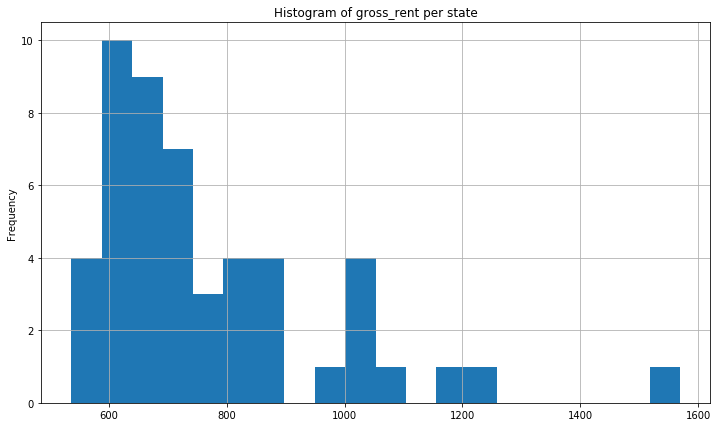

In [16]:
plt.figure(figsize=(12,7))
figX = train.gross_rent.groupby(train.state).mean().hist(bins=20)
figX.set_title('Histogram of gross_rent per state')
figX.set_ylabel('Frequency')
plt.show()

In [17]:
train.county_code.groupby(train.state).count().sort_values()

state
914c15f      1
9e065a4      1
375d4d3      2
6d287d7      4
105e445      4
fa605d5      6
2b7da97      6
3337bbb      6
dfc21f3      6
b44cfe6      6
bc77872      7
5029ed4      8
d233cec     10
64ffe5d     15
176f5f0     16
7dd3518     18
3745933     19
4cd9667     20
698ab34     21
485e9af     25
842bd12     26
1646cf6     27
5086a32     28
fb8cab1     30
4c72956     31
e899d7f     31
52acab4     31
9e0007d     33
78e8330     33
c3dbf0a     34
8036085     35
e74aca3     36
1dcfd4e     37
158df01     38
9d0874a     39
9dda412     39
7572db1     40
0f8930b     44
e2f94fa     44
b795815     45
09d8cd0     47
9d1e27d     47
dc9ae72     50
08f8fb4     54
c479f0c     56
20d32fc     56
528ea9f     57
a952566     69
4522abc     93
1b0d913    131
Name: county_code, dtype: int64

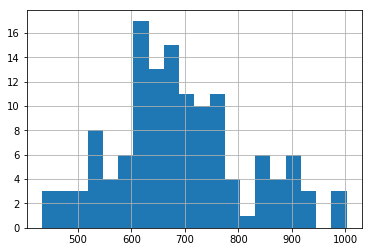

In [18]:
train[train['state']=='1b0d913'].gross_rent.hist(bins=20)

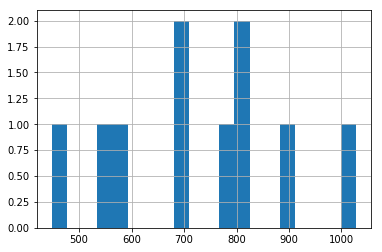

In [19]:
train[train['state']=='d233cec'].gross_rent.hist(bins=20)

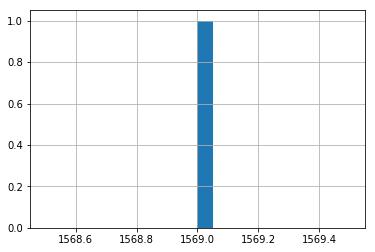

In [20]:
train[train['state']=='914c15f'].gross_rent.hist(bins=20)    

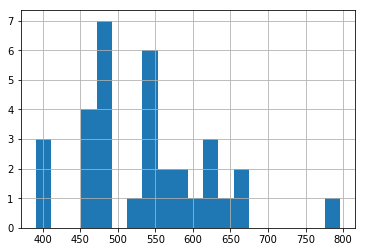

In [21]:
train[train['state']=='78e8330'].gross_rent.hist(bins=20)    

In [22]:
train.groupby(by='state').median()['gross_rent'].sort_values()

state
78e8330     536.0
8036085     554.0
528ea9f     556.0
fb8cab1     562.5
e899d7f     575.0
c3dbf0a     575.5
b795815     585.0
9d0874a     588.0
e2f94fa     590.5
9e0007d     596.0
9d1e27d     597.0
08f8fb4     597.0
dc9ae72     609.5
c479f0c     616.5
52acab4     618.0
9dda412     627.0
485e9af     631.0
4522abc     635.0
842bd12     652.0
158df01     661.0
698ab34     668.0
e74aca3     672.5
20d32fc     673.0
0f8930b     675.0
1b0d913     675.0
09d8cd0     680.0
5029ed4     687.0
1646cf6     714.0
5086a32     728.5
4cd9667     738.0
d233cec     740.5
176f5f0     752.5
64ffe5d     761.0
6d287d7     765.5
fa605d5     774.0
375d4d3     795.0
3745933     798.0
1dcfd4e     829.0
a952566     861.0
7572db1     865.0
2b7da97     869.0
9e065a4     974.0
4c72956     989.0
105e445    1021.5
3337bbb    1031.0
7dd3518    1045.0
dfc21f3    1090.0
b44cfe6    1139.5
bc77872    1299.0
914c15f    1569.0
Name: gross_rent, dtype: float64

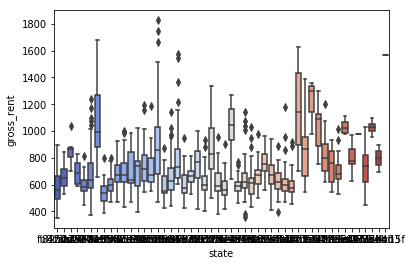

In [23]:
sns.boxplot(x="state", y="gross_rent",data=train, palette="coolwarm")